In [6]:
import pandas as pd
import numpy as np
import scipy.io as sp
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

In [8]:
dataSet = sp.loadmat('breastw.mat') 
X = dataSet['X']
y = dataSet['y']

In [9]:
plage_contamination = np.arange (0.01, 0.51, 0.01)
maxfeatures = np.arange(5, 10, 1)
MS= np.arange(10, 410, 10)
nombre_estim = np.arange(10,1010,10) #permet de créer une liste de int de 1 à 100 pour faire varier le nombre d'estimateur dans la boucle for 
data = np.array([['Nombre estimateur','Max Samples','Contamination','MaxFeature','F1 score','recall','precision','accuracy','AUC','numero_fold']])

In [10]:
plage_contamination = [0.01, 0.05, 0.1, 0.3, 0.5]
maxfeatures1 = np.arange(1, 10, 1) # 9 valeurs
maxfeatures = [1,2,3,4,5,6,7,8,9] # 9 valeurs
maxsamples =[10, 50, 100, 300] # 4 valeurs
nombre_estim = [10, 50, 100, 500] #4 valeurs
print(plage_contamination)
print(maxfeatures)
print(maxsamples)
print(nombre_estim)

[0.01, 0.05, 0.1, 0.3, 0.5]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[10, 50, 100, 300]
[10, 50, 100, 500]


In [7]:
import pandas as pd
import numpy as np
import scipy.io as sp
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

dataSet = sp.loadmat('breastw.mat') 
X = dataSet['X']
y = dataSet['y']

#lage_contamination = [0.01, 0.05, 0.1, 0.3, 0.5] # 5 valeurs
plage_contamination = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.35, 0.4, 0.5] # 15 valeurs
#plage_contamination = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5] # 18valeurs
#plage_contamination = np.arange (0.01, 0.51, 0.01) # 50 valeurs
maxfeatures = np.arange(1, 10, 1) # 9 valeurs
#maxsamples =[10, 50, 100, 300] # 4 valeurs
maxsamples =[1, 10, 20, 30, 40, 50, 80, 100, 200, 300] # 10 valeurs
#MS =[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 300, 350] # 13 valeurs
#MS = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350] # 16 valeurs
#MS= np.arange(10, 360, 10)
#nombre_estim = [10, 50, 100, 500] #4 valeurs
nombre_estim = [1,10,20,30,40,50,80,100,300,500] #10 valeurs
#nombre_estim = [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500] #15 valeurs
#nombre_estim = [1,10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,600,700,800,900,1000] #24 valeurs
#nombre_estim = np.arange(10,1010,10) #permet de créer une liste de int de 1 à 100 pour faire varier le nombre d'estimateur dans la boucle for 
data = np.array([['Nombre estimateur','Max Samples','Contamination','MaxFeature','F1 score','recall','precision','accuracy','AUC','numero_fold']])

skf = StratifiedKFold(n_splits=2)
fold=0
for train_index, test_index in skf.split(X, y):
    fold=fold+1
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    for estim in nombre_estim:
        for MS in maxsamples:
            for C in plage_contamination:
                for MF in maxfeatures:
                    model = IsolationForest(contamination=C, n_estimators=estim, max_features=MF, max_samples=MS)
                    model.fit(X_train)
                    y_pred=model.predict(X_test)
                    y_pred[y_pred>0]=0
                    y_pred[y_pred<0]=1
                    F1=round(f1_score(y_test,y_pred),3)
                    recall=round(recall_score(y_test,y_pred),3)
                    precision=round(precision_score(y_test,y_pred,zero_division=0),3)
                    accuracy=round(accuracy_score(y_test,y_pred),3)
                    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
                    roc_auc = round(metrics.auc(fpr, tpr),3)
                    data = np.append(data, [[estim,MS,C,MF,F1,recall,precision,accuracy,roc_auc,fold]],axis=0)
data

array([['Nombre estimateur', 'Max Samples', 'Contamination', ...,
        'accuracy', 'AUC', 'numero_fold'],
       ['1.0', '1.0', '0.01', ..., '0.649', '0.5', '1.0'],
       ['1.0', '1.0', '0.01', ..., '0.649', '0.5', '1.0'],
       ...,
       ['500.0', '300.0', '0.5', ..., '0.856', '0.89', '2.0'],
       ['500.0', '300.0', '0.5', ..., '0.859', '0.892', '2.0'],
       ['500.0', '300.0', '0.5', ..., '0.842', '0.878', '2.0']],
      dtype='<U32')

117 minutes de compilation

In [8]:
# création du dataframe
df = pd.DataFrame(data, columns=['Nombre estimateurs','Max Samples','Contamination','Max Features','F1 score','recall','precision','accuracy','AUC','numero fold'])
df=df.drop(df.index[0])
df
df.to_excel('Dataframe_2_splits_0_35.xlsx')

In [12]:
# filtrage des meilleurs combinaisons de paramètres
df = df.astype({'F1 score': float, 'recall': float,'precision': float,'accuracy': float,'AUC': float,'numero fold' : float})

filtered_values_fold_1 = np.where((df['F1 score']>=0.9) & (df['recall']>=0.9) & (df['precision']>=0.9) & (df['AUC']>=0.9) & (df['numero fold'] == 1))
filtered_values_fold_2 = np.where((df['F1 score']>=0.9) & (df['recall']>=0.9) & (df['precision']>=0.9) & (df['AUC']>=0.9) & (df['numero fold'] == 2))

display(df.iloc[filtered_values_fold_1].sort_values(by=['AUC'], ascending=False))
display(df.iloc[filtered_values_fold_2].sort_values(by=['AUC'], ascending=False))

,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold


,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold


In [33]:

# sauvegarde des meilleurs conbi dans les excels !
df_best_values_fold_1 = df.iloc[filtered_values_fold_1].sort_values(by=['AUC'], ascending=False)
df_best_values_fold_2 = df.iloc[filtered_values_fold_2].sort_values(by=['AUC'], ascending=False)
#df_best_values_fold_1.to_excel('Dataframe_best-values_2_splits.xlsx',sheet_name='split_1')
#df_best_values_fold_2.to_excel('Dataframe_best-values_2_splits.xlsx',sheet_name='split_2')
writer = pd.ExcelWriter('Dataframe_best-values_2_splits.xlsx', engine='xlsxwriter')
df_best_values_fold_1.to_excel(writer, sheet_name='split_1')
df_best_values_fold_2.to_excel(writer, sheet_name='split_2')
writer.save()
# source : https://www.statology.org/write-multiple-excel-sheets-pandas/#:~:text=Often%20you%20may%20have%20multiple%20pandas%20DataFrames%20that,need%20to%20make%20sure%20you%20have%20xlsxwriter%20installed%3A

In [3]:
# Rechargement du dataframe stocker dans un fichier excel afin d'éviter le recalcule très long
# source : https://fr.acervolima.com/chargement-de-la-feuille-de-calcul-excel-en-tant-que-pandas-dataframe/
excel_file = pd.ExcelFile('Dataframe_2_splits_collee.xlsx') 
df_from_excel = excel_file.parse('Sheet1') 
display(df_from_excel)

,Unnamed: 0,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
0,1,1,1,0.01,1,0.000,0.0,0.000,0.649,0.500,1
1,2,1,1,0.01,2,0.000,0.0,0.000,0.649,0.500,1
2,3,1,1,0.01,3,0.000,0.0,0.000,0.649,0.500,1
3,4,1,1,0.01,4,0.000,0.0,0.000,0.649,0.500,1
4,5,1,1,0.01,5,0.000,0.0,0.000,0.649,0.500,1
...,...,...,...,...,...,...,...,...,...,...,...
25195,25196,500,300,0.50,5,0.824,1.0,0.700,0.850,0.885,2
25196,25197,500,300,0.50,6,0.841,1.0,0.726,0.868,0.899,2
25197,25198,500,300,0.50,7,0.826,1.0,0.704,0.853,0.887,2
25198,25199,500,300,0.50,8,0.815,1.0,0.688,0.842,0.878,2


In [4]:
# https://www.delftstack.com/fr/howto/python-pandas/how-to-delete-pandas-dataframe-column/#:~:text=M%C3%A9thode%20del%20pour%20supprimer%20une%20colonne%20de%20DataFrame,peut%20effacer%20qu%E2%80%99une%20seule%20colonne%20%C3%A0%20la%20fois.
# supprimer la colonne unamed
df_from_excel_good=df_from_excel.drop(["Unnamed: 0"], axis = 1)
display(df_from_excel_good)

,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
0,1,1,0.01,1,0.000,0.0,0.000,0.649,0.500,1
1,1,1,0.01,2,0.000,0.0,0.000,0.649,0.500,1
2,1,1,0.01,3,0.000,0.0,0.000,0.649,0.500,1
3,1,1,0.01,4,0.000,0.0,0.000,0.649,0.500,1
4,1,1,0.01,5,0.000,0.0,0.000,0.649,0.500,1
...,...,...,...,...,...,...,...,...,...,...
25195,500,300,0.50,5,0.824,1.0,0.700,0.850,0.885,2
25196,500,300,0.50,6,0.841,1.0,0.726,0.868,0.899,2
25197,500,300,0.50,7,0.826,1.0,0.704,0.853,0.887,2
25198,500,300,0.50,8,0.815,1.0,0.688,0.842,0.878,2


In [5]:
filtered_values_fold_1 = np.where((df_from_excel_good['F1 score']>=0.9) & (df_from_excel_good['recall']>=0.9) & (df_from_excel_good['precision']>=0.9) & (df_from_excel_good['AUC']>=0.9) & (df_from_excel_good['numero fold'] == 1))
filtered_values_fold_2 = np.where((df_from_excel_good['F1 score']>=0.9) & (df_from_excel_good['recall']>=0.9) & (df_from_excel_good['precision']>=0.9) & (df_from_excel_good['AUC']>=0.9) & (df_from_excel_good['numero fold'] == 2))
df_best_values_fold_1 = df_from_excel_good.iloc[filtered_values_fold_1].sort_values(by=['AUC'], ascending=False)
df_best_values_fold_2 = df_from_excel_good.iloc[filtered_values_fold_2]

In [6]:
display(df_best_values_fold_1)

,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
3379,20,80,0.3,5,0.922,0.933,0.911,0.944,0.942,1
6273,40,300,0.3,1,0.922,0.933,0.911,0.944,0.942,1
1487,10,10,0.3,3,0.928,0.908,0.948,0.950,0.941,1
9929,100,200,0.3,3,0.918,0.933,0.903,0.942,0.940,1
4888,30,200,0.3,2,0.924,0.908,0.940,0.947,0.938,1
2245,10,100,0.3,5,0.917,0.925,0.910,0.942,0.938,1
6274,40,300,0.3,2,0.917,0.925,0.910,0.942,0.938,1
6021,40,100,0.3,1,0.917,0.917,0.917,0.942,0.936,1
5392,40,20,0.3,2,0.917,0.917,0.917,0.942,0.936,1
6151,40,200,0.3,5,0.914,0.925,0.902,0.939,0.935,1


In [7]:
display(df_best_values_fold_2)

,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
13088,1,30,0.4,3,0.923,0.908,0.939,0.947,0.938,2
13093,1,30,0.4,8,0.904,0.908,0.900,0.933,0.927,2
13469,1,80,0.4,6,0.954,0.958,0.950,0.968,0.965,2
13729,1,200,0.5,5,0.943,0.975,0.913,0.959,0.963,2
13846,1,300,0.4,5,0.932,0.924,0.940,0.953,0.946,2
...,...,...,...,...,...,...,...,...,...,...
25184,500,300,0.4,3,0.952,1.000,0.908,0.965,0.973,2
25185,500,300,0.4,4,0.952,1.000,0.908,0.965,0.973,2
25186,500,300,0.4,5,0.948,1.000,0.902,0.962,0.971,2
25188,500,300,0.4,7,0.944,0.992,0.901,0.959,0.967,2


<function matplotlib.pyplot.show(close=None, block=None)>

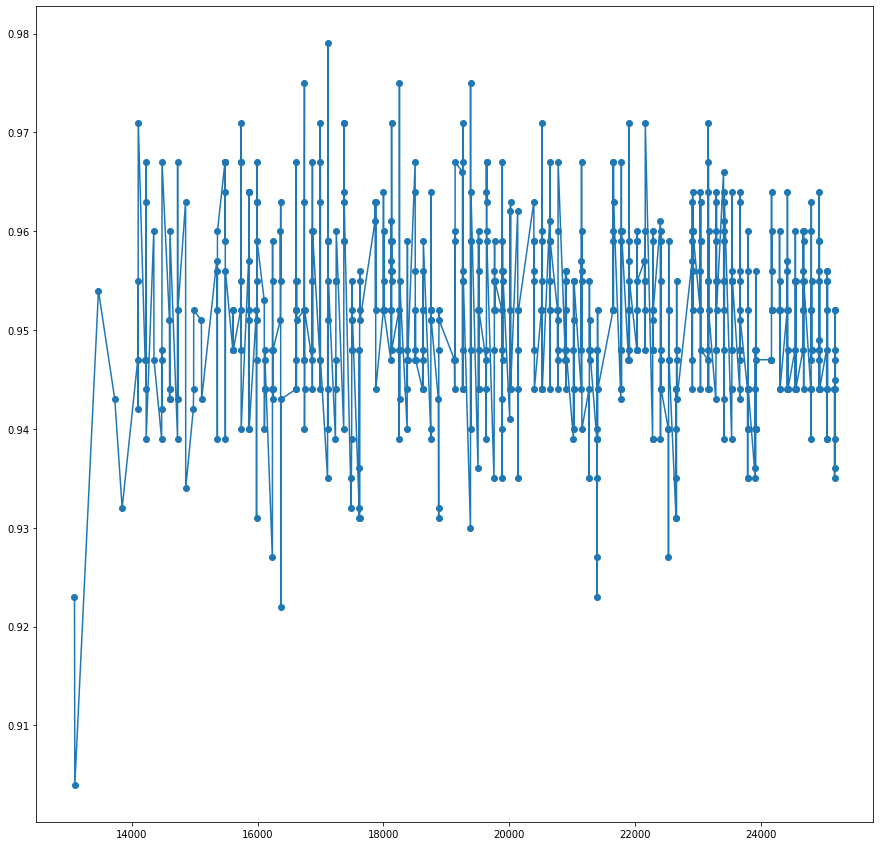

In [48]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# lier les nuages de points : https://www.delftstack.com/howto/matplotlib/how-to-connect-scatterplot-points-with-line-in-matplotlib/#:~:text=We%20can%20connect%20scatter%20plot%20points%20with%20a,After%20Calling%20Both%20scatter%20%28%29%20and%20plot%20%28%29
df_best_values_fold_2 = df_from_excel_good.iloc[filtered_values_fold_2].sort_index(ignore_index = False)


plt.figure(figsize=(15.0,15.0))
plt.scatter(df_best_values_fold_2.index, df_best_values_fold_2['F1 score'])
plt.plot(df_best_values_fold_2.index, df_best_values_fold_2['F1 score'])
plt.show
#plt.plot(df_best_values_fold_1['F1 score'], label=['Nb estimateurs:' % df_best_values_fold_1['Nombre estimateurs'],'Max samples:' % df_best_values_fold_1['Max Sampl

<function matplotlib.pyplot.show(close=None, block=None)>

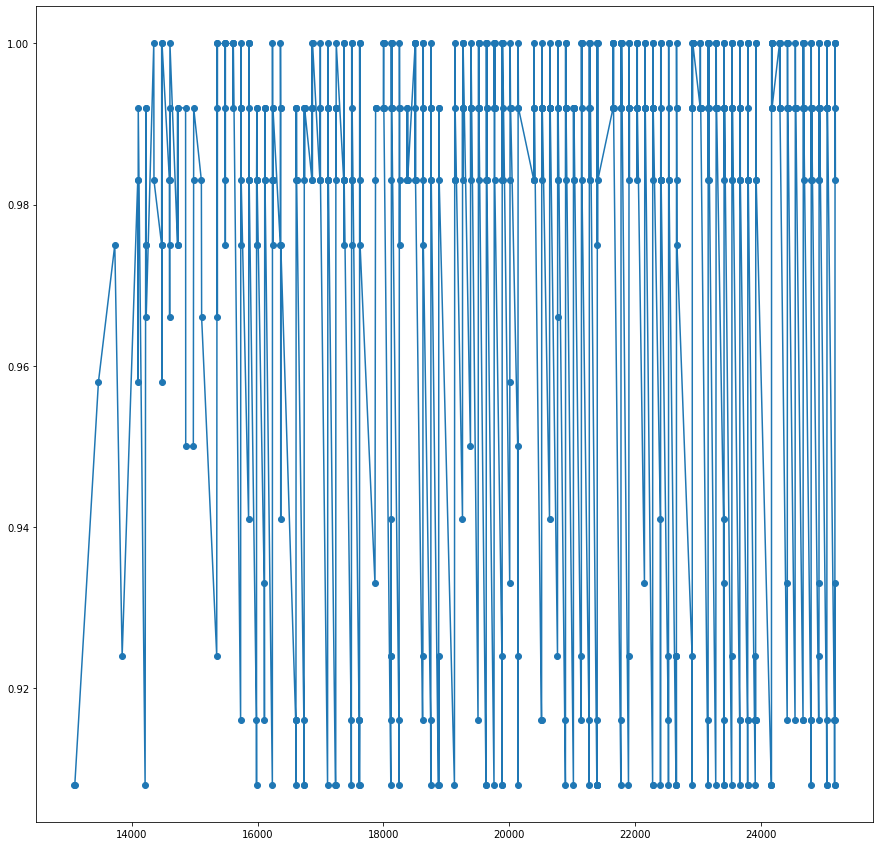

In [49]:
df_best_values_fold_2 = df_from_excel_good.iloc[filtered_values_fold_2].sort_index(ignore_index = False)


plt.figure(figsize=(15.0,15.0))
plt.scatter(df_best_values_fold_2.index, df_best_values_fold_2['recall'])
plt.plot(df_best_values_fold_2.index, df_best_values_fold_2['recall'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

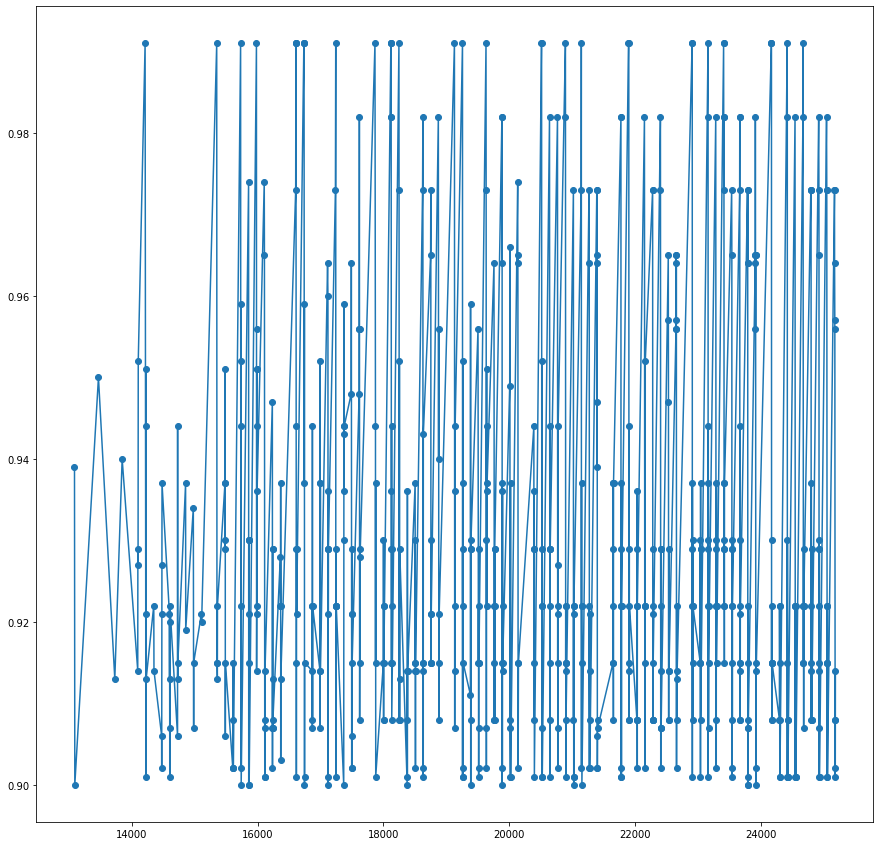

In [50]:
df_best_values_fold_2 = df_from_excel_good.iloc[filtered_values_fold_2].sort_index(ignore_index = False)


plt.figure(figsize=(15.0,15.0))
plt.scatter(df_best_values_fold_2.index, df_best_values_fold_2['precision'])
plt.plot(df_best_values_fold_2.index, df_best_values_fold_2['precision'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

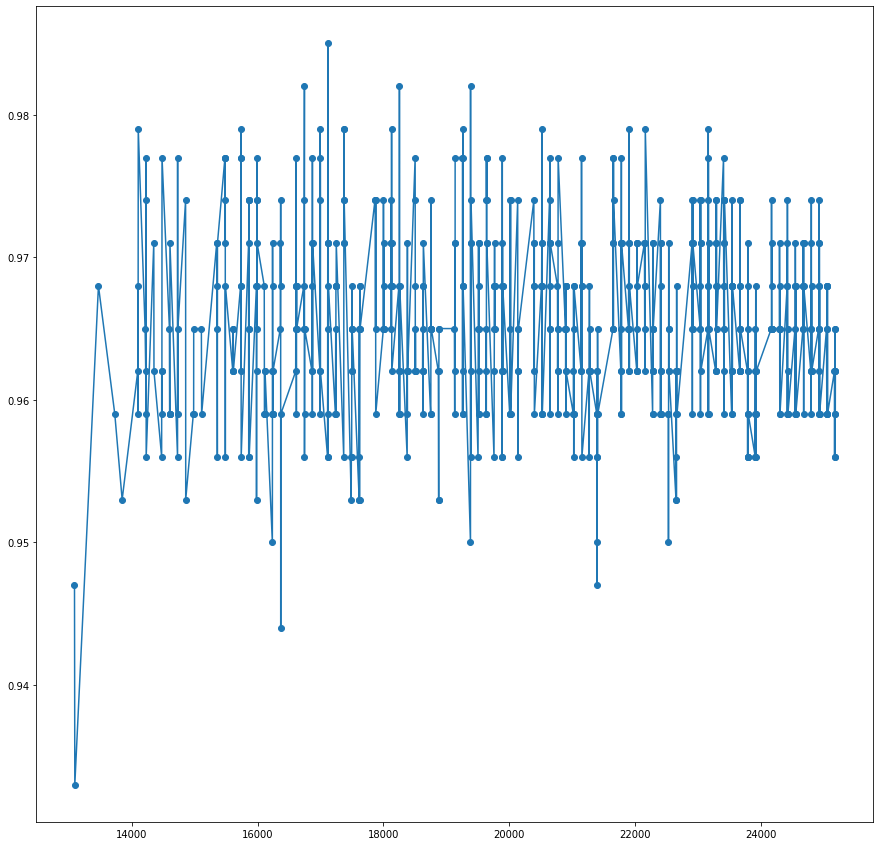

In [51]:
df_best_values_fold_2 = df_from_excel_good.iloc[filtered_values_fold_2].sort_index(ignore_index = False)


plt.figure(figsize=(15.0,15.0))
plt.scatter(df_best_values_fold_2.index, df_best_values_fold_2['accuracy'])
plt.plot(df_best_values_fold_2.index, df_best_values_fold_2['accuracy'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

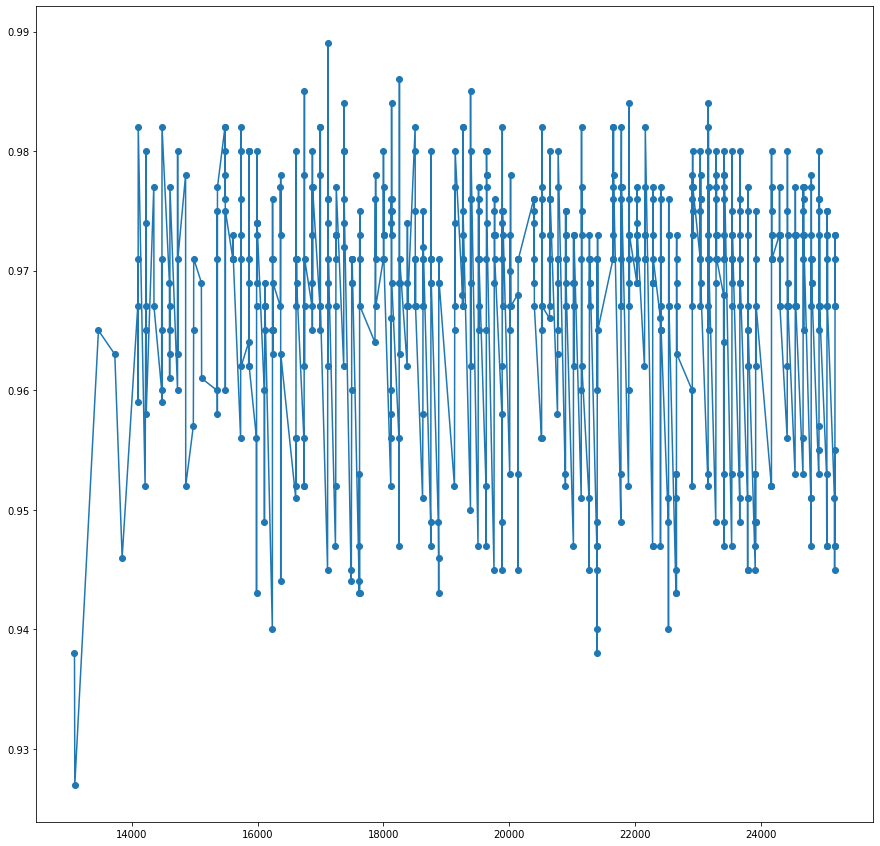

In [52]:
df_best_values_fold_2 = df_from_excel_good.iloc[filtered_values_fold_2].sort_index(ignore_index = False)


plt.figure(figsize=(15.0,15.0))
plt.scatter(df_best_values_fold_2.index, df_best_values_fold_2['AUC'])
plt.plot(df_best_values_fold_2.index, df_best_values_fold_2['AUC'])
plt.show

In [6]:
df_from_excel_good_csv = df_from_excel_good.to_csv(r'D:\Projet data sciences\Projet_data\Test_leo\df_from_excel_good.csv')

NameError: name 'df_from_excel_good' is not defined

In [8]:
from mlxtend.evaluate import paired_ttest_5x2cv

In [53]:
isolation_forest1 = IsolationForest(contamination=0.4, n_estimators=30, max_features=2, max_samples=50)
isolation_forest2 = IsolationForest(contamination=0.3, n_estimators=20, max_features=5, max_samples=80)

In [54]:
t, p = paired_ttest_5x2cv(estimator1=isolation_forest1, estimator2=isolation_forest2,X=X, y=y, random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

AttributeError: Estimator must be a Classifier or Regressor.

In [ ]:
plage_contamination = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.35, 0.4, 0.5] # 15 valeurs
maxfeatures = np.arange(1, 10, 1) # 9 valeurs
maxsamples =[1, 10, 20, 30, 40, 50, 80, 100, 200, 300] # 10 valeurs
nombre_estim = [1,10,20,30,40,50,80,100,300,500] #10 valeurs